In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

In [78]:
train = pd.read_csv('D:\Jupyter Notebook\Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [80]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [81]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [82]:
train.Outlet_Identifier.nunique()

10

In [83]:
train.Item_Identifier.nunique()

1559

In [84]:
train.shape

(8523, 12)

In [85]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
cat_cols = ['Item_Type', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']
target = 'Item_Outlet_Sales'

In [86]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [87]:
weights = {}
for key, df in train.groupby(['Item_Type', 'Item_Fat_Content']):
    weights[key] = df['Item_Weight'].mean()
print(weights)

{('Baking Goods', 'LF'): 12.294043555240794, ('Baking Goods', 'Low Fat'): 12.676390101926533, ('Baking Goods', 'Regular'): 12.102880353274454, ('Baking Goods', 'low fat'): 11.109116944050992, ('Baking Goods', 'reg'): 12.82751116801046, ('Breads', 'LF'): 12.584116944050992, ('Breads', 'Low Fat'): 12.538953921039614, ('Breads', 'Regular'): 10.58618429335851, ('Breads', 'low fat'): 11.859215061378658, ('Breads', 'reg'): 8.013333333333334, ('Breakfast', 'LF'): 13.7475, ('Breakfast', 'Low Fat'): 11.933038879203894, ('Breakfast', 'Regular'): 13.358239292207516, ('Breakfast', 'reg'): 9.247499999999999, ('Canned', 'LF'): 13.181037952007998, ('Canned', 'Low Fat'): 11.964131398747766, ('Canned', 'Regular'): 12.83619594195019, ('Canned', 'low fat'): 11.964558073654391, ('Canned', 'reg'): 12.209571851661087, ('Dairy', 'LF'): 13.263860216005668, ('Dairy', 'Low Fat'): 13.310009714785755, ('Dairy', 'Regular'): 13.333225810879066, ('Dairy', 'low fat'): 13.39357796270066, ('Dairy', 'reg'): 14.531715061

In [88]:
train['Item_Weight'] = train.apply(lambda x:weights[(x['Item_Type'], x['Item_Fat_Content'])]
                                   if np.isnan(x['Item_Weight']) 
                                   else x['Item_Weight'], axis = 1)

In [89]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode().values[0])

In [90]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [91]:
def cat_cols_info(df, col):
    print("Unique categories in {}".format(col))
    print(df[col].unique())
    print("Distribution of categories: \n")
    print(df[col].value_counts())
    print('\n')

In [92]:
for col in cat_cols:
    cat_cols_info(train, col)

Unique categories in Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Distribution of categories: 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Unique categories in Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Distribution of categories: 

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112

In [93]:
train.Item_Fat_Content.replace('Low Fat', 'LF', inplace = True)
train.Item_Fat_Content.replace('low fat', 'LF', inplace = True)
train.Item_Fat_Content.replace('reg', 'Regular', inplace = True)

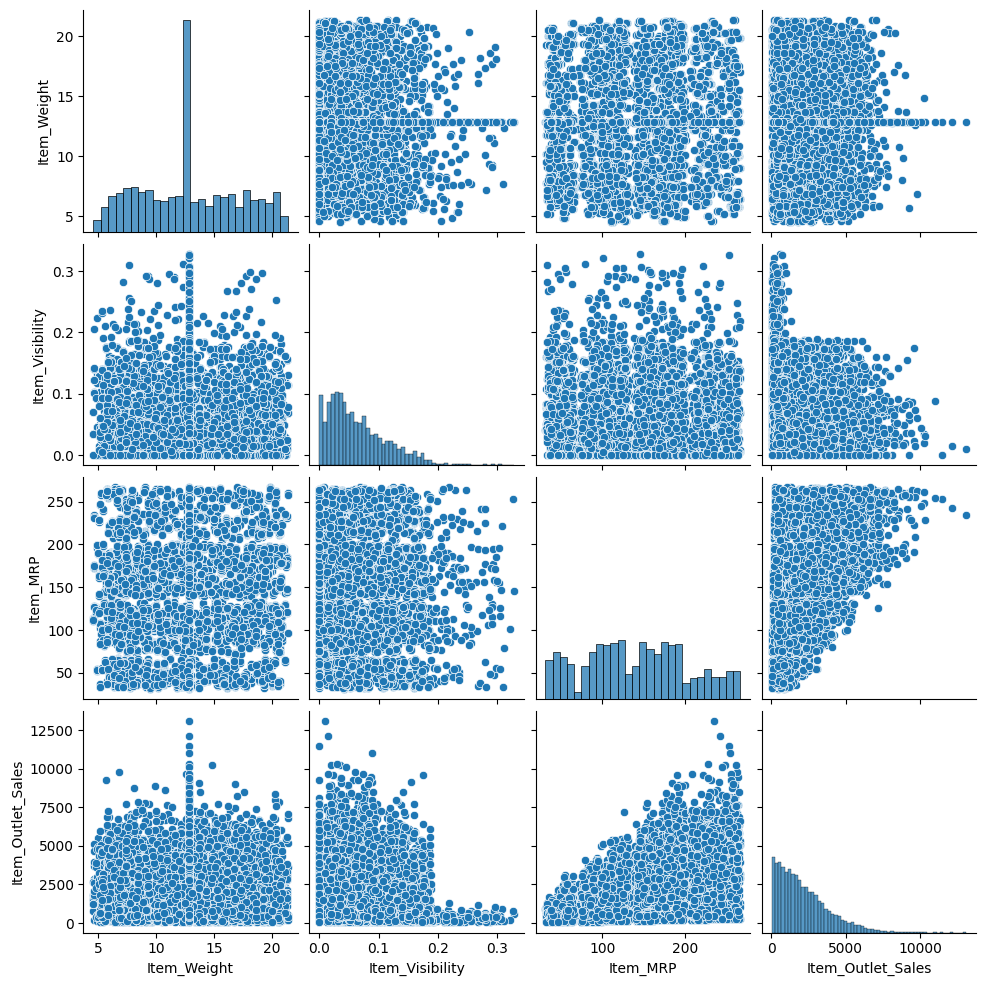

In [94]:
sns.pairplot(train[num_cols+[target]])

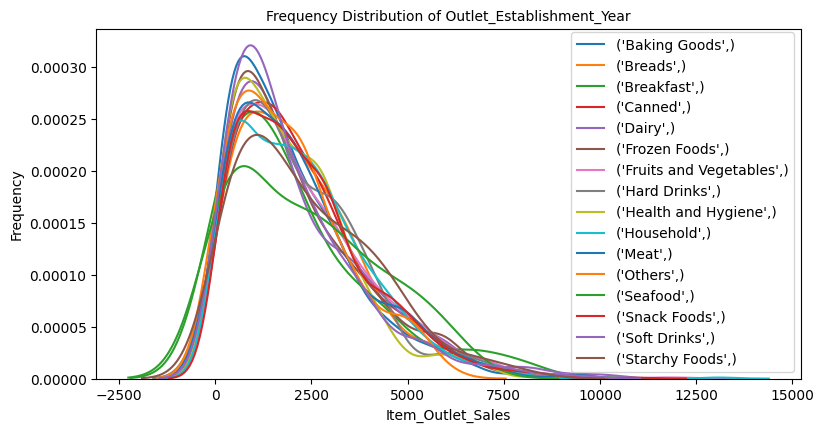

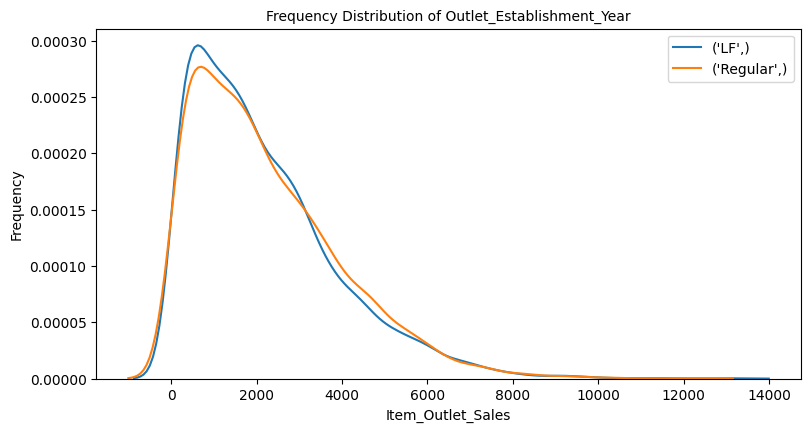

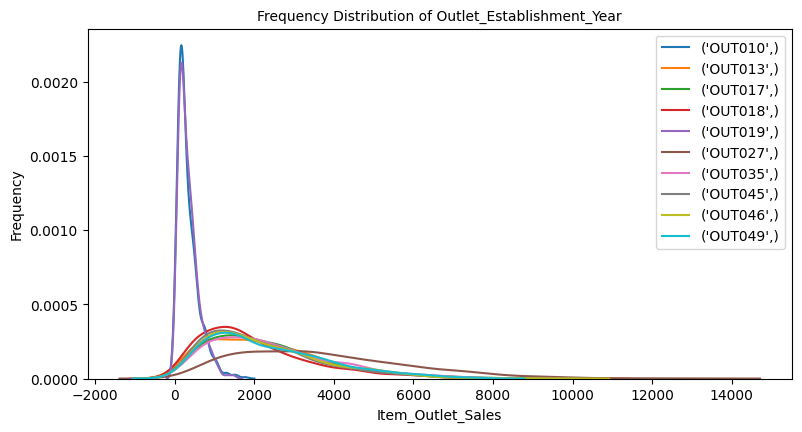

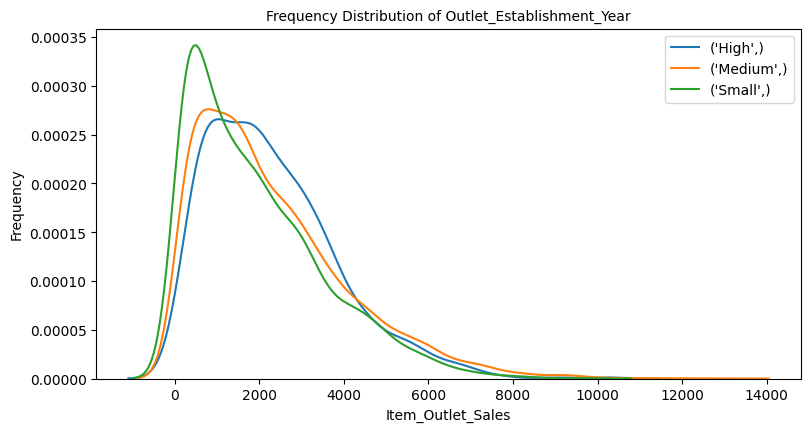

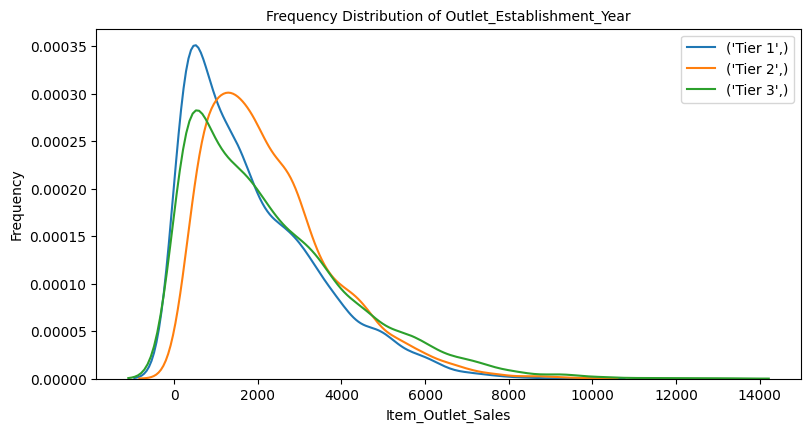

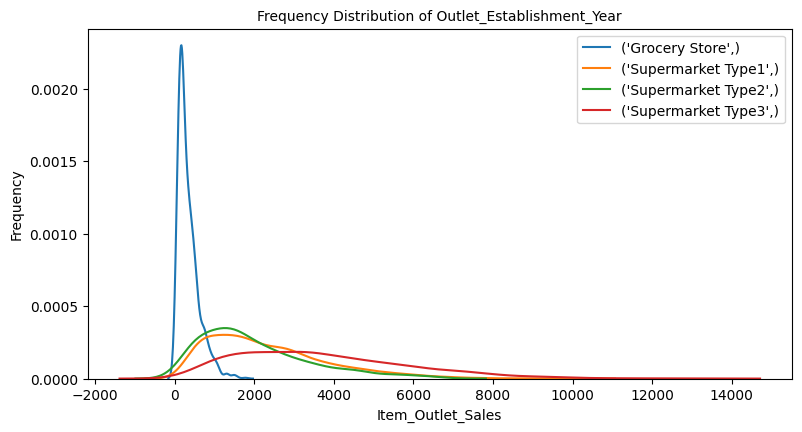

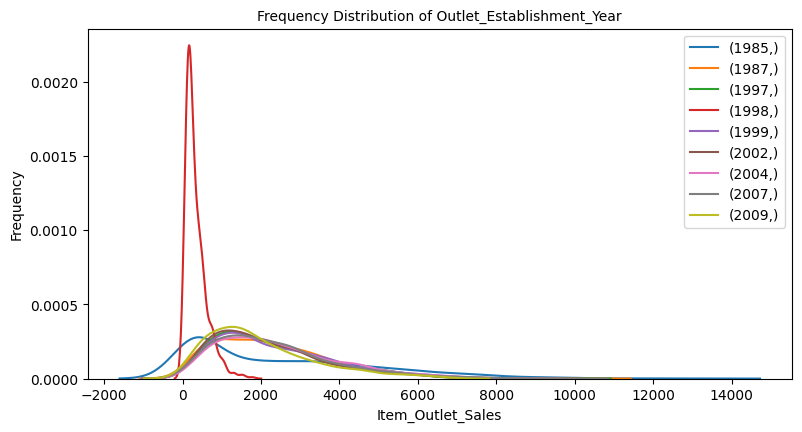

In [23]:
for cat_col in cat_cols:
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(2, 2, 2)
    j = 0
    for key, df in train.groupby([cat_col]):
        sns.kdeplot(df[target], label = key)
        ax.set_xlabel(target)
        ax.set_ylabel("Frequency")
        ax.legend(loc = "best")
        ax.set_title('Frequency Distribution of {}'.format(col), fontsize = 10)
        j = j + 1

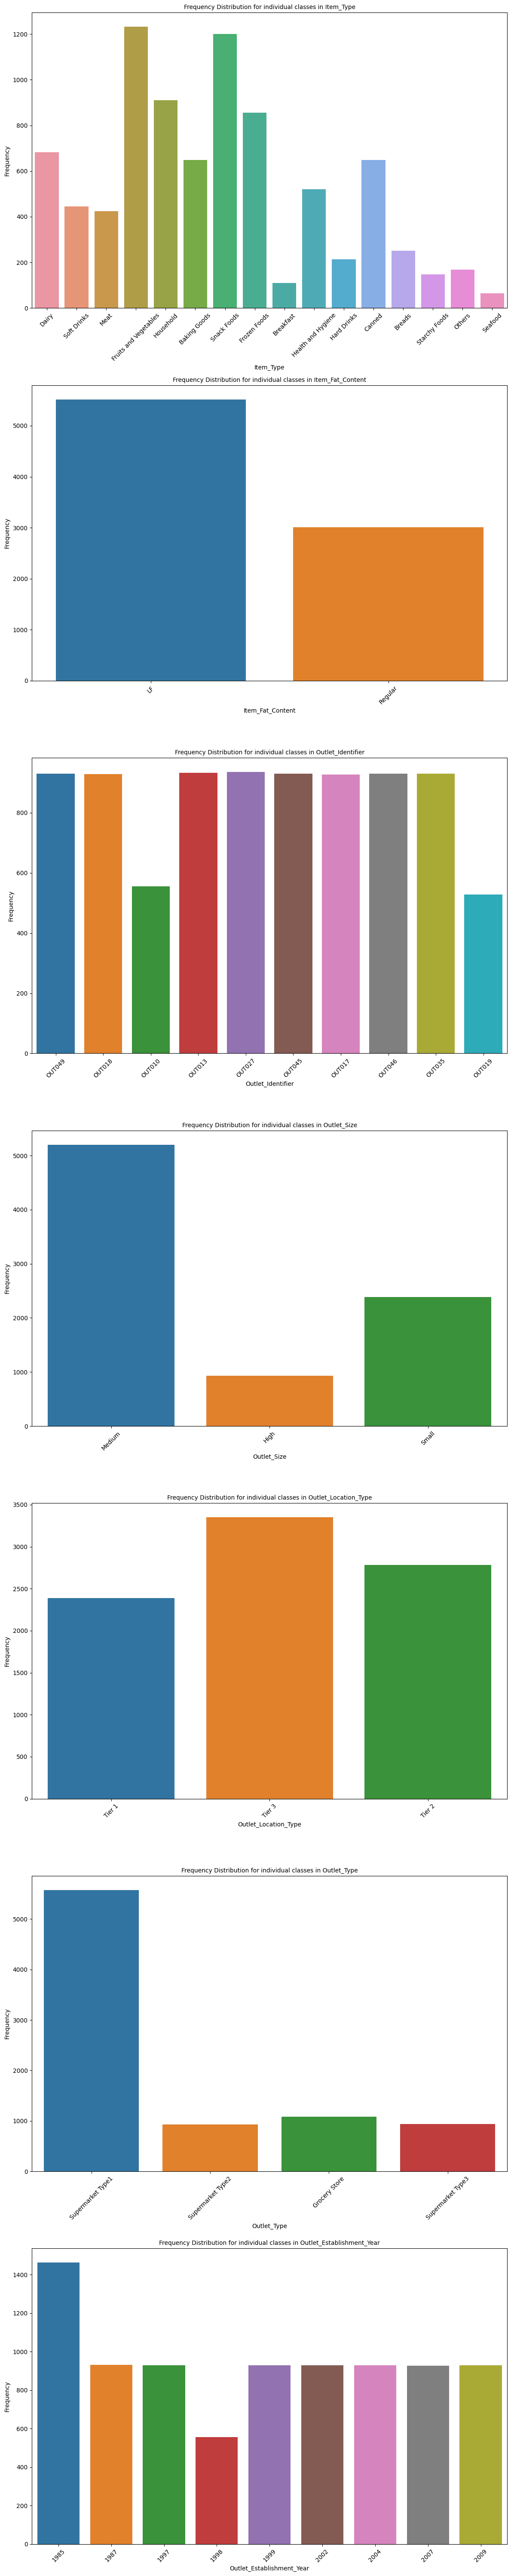

In [95]:
fig = plt.figure(figsize=(12, 60))  # Adjust the figure size as desired
j = 1
for cat_col in cat_cols:
    ax = fig.add_subplot(len(cat_cols), 1, j)
    sns.countplot(x=cat_col, data=train, ax=ax)
    ax.set_xlabel(cat_col)
    ax.set_ylabel("Frequency")
    ax.set_title('Frequency Distribution for individual classes in {}'.format(cat_col), fontsize=10)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
    j = j + 1

fig.tight_layout()  # Adjust spacing between subplots
plt.show()


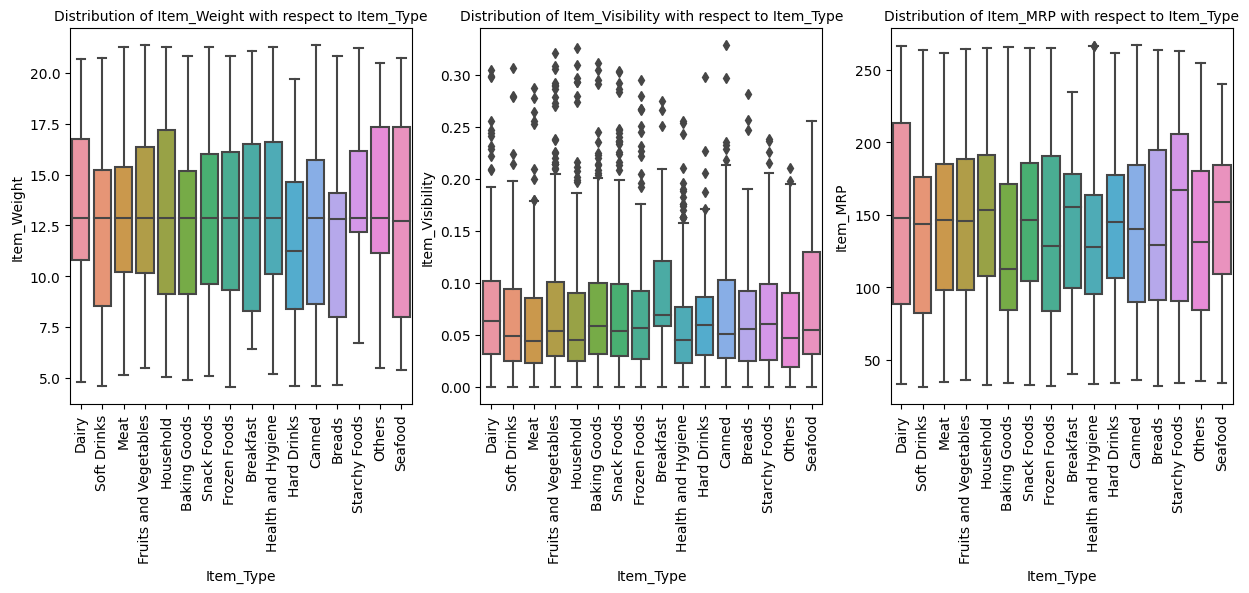

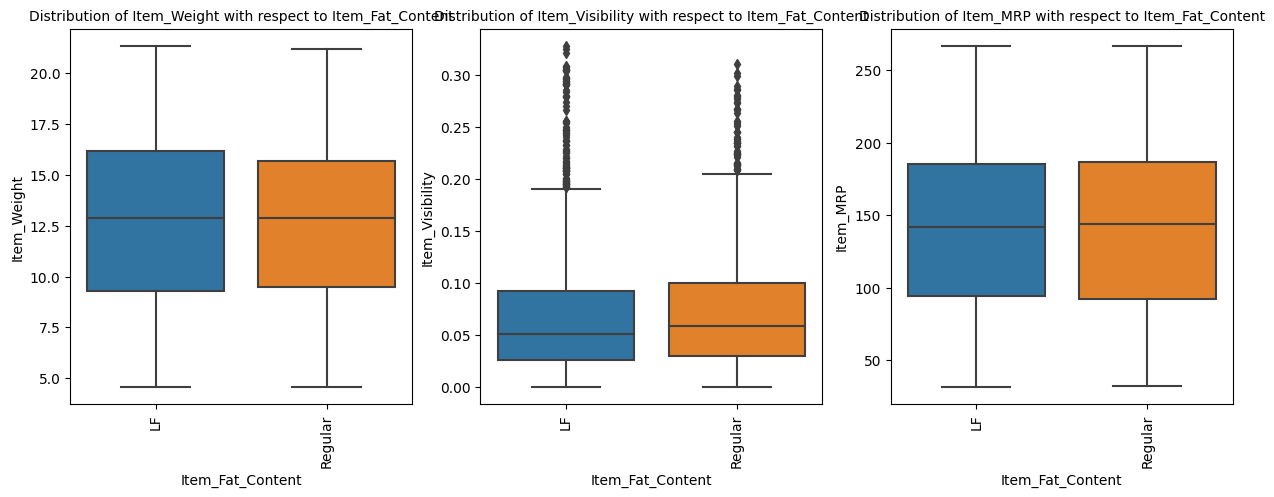

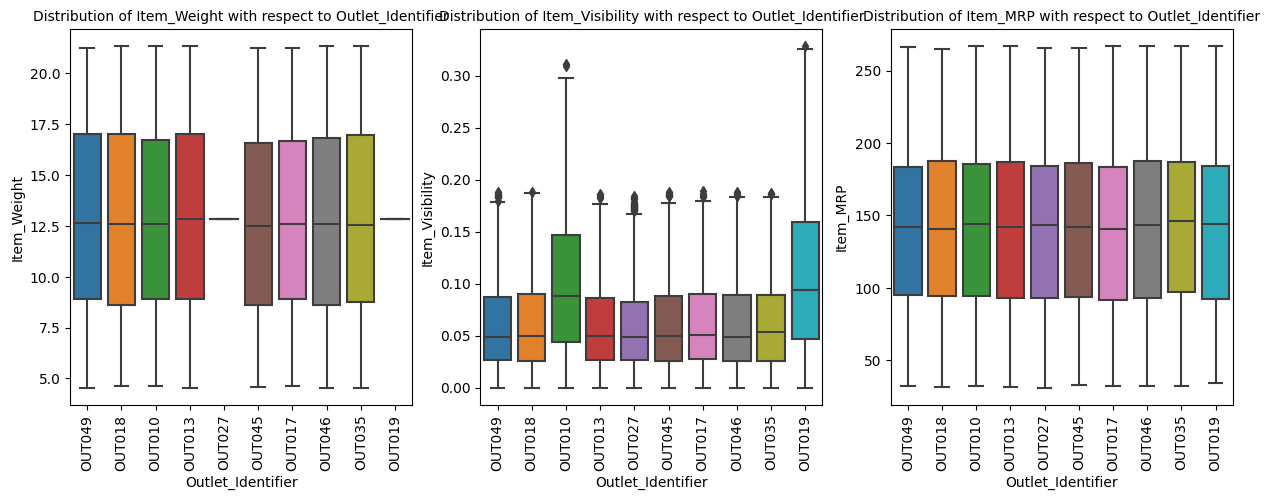

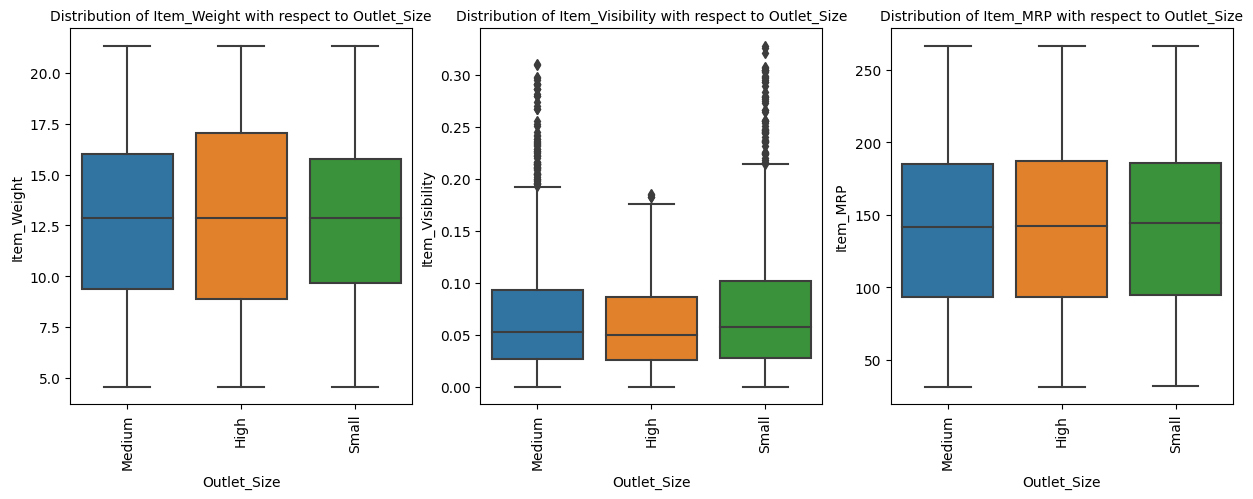

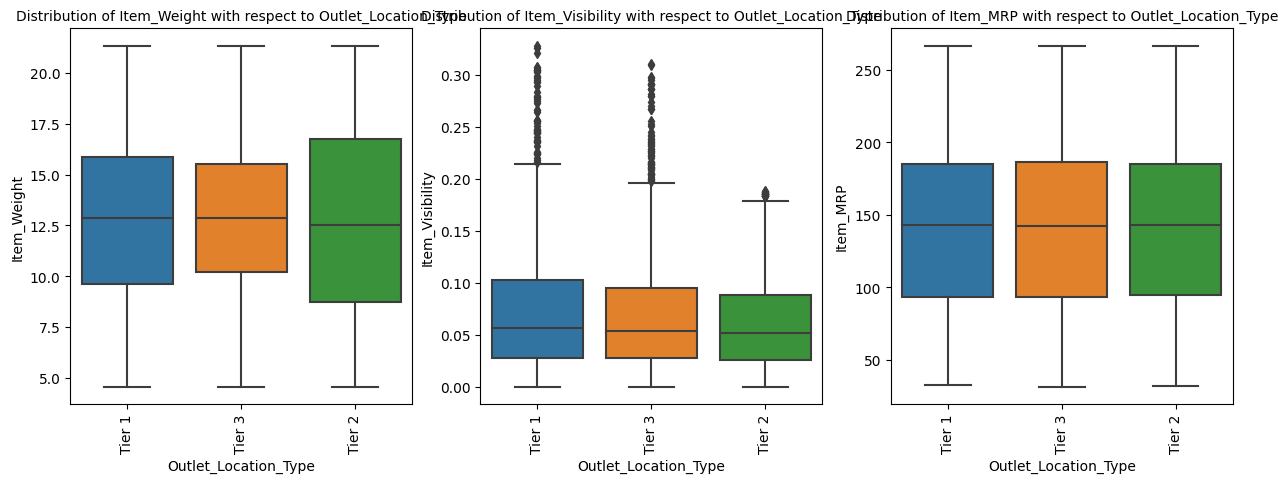

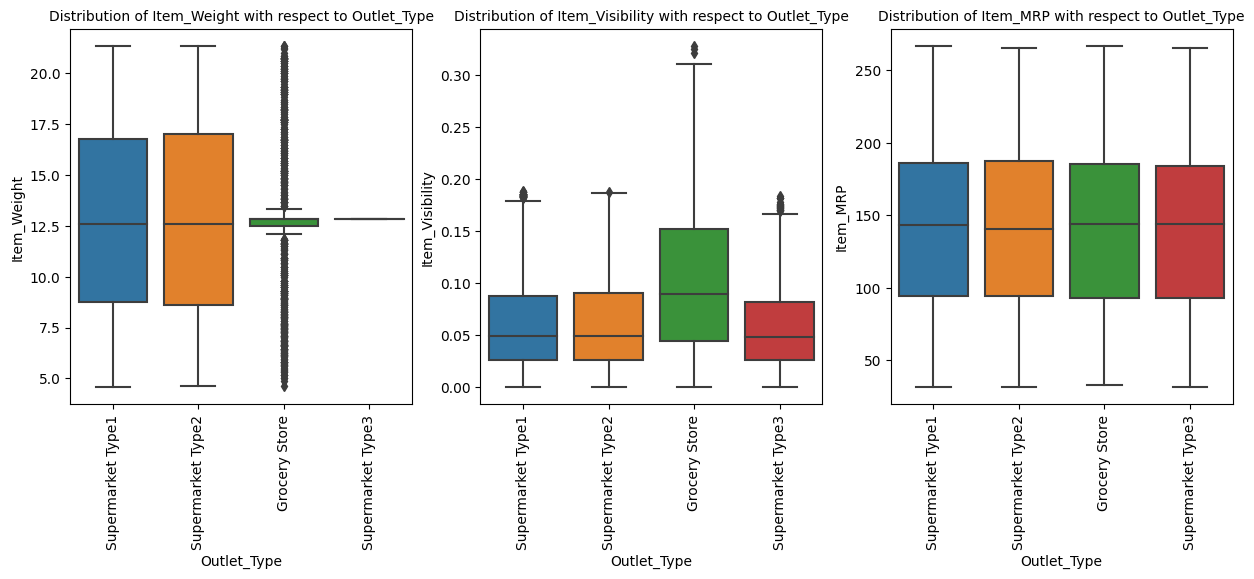

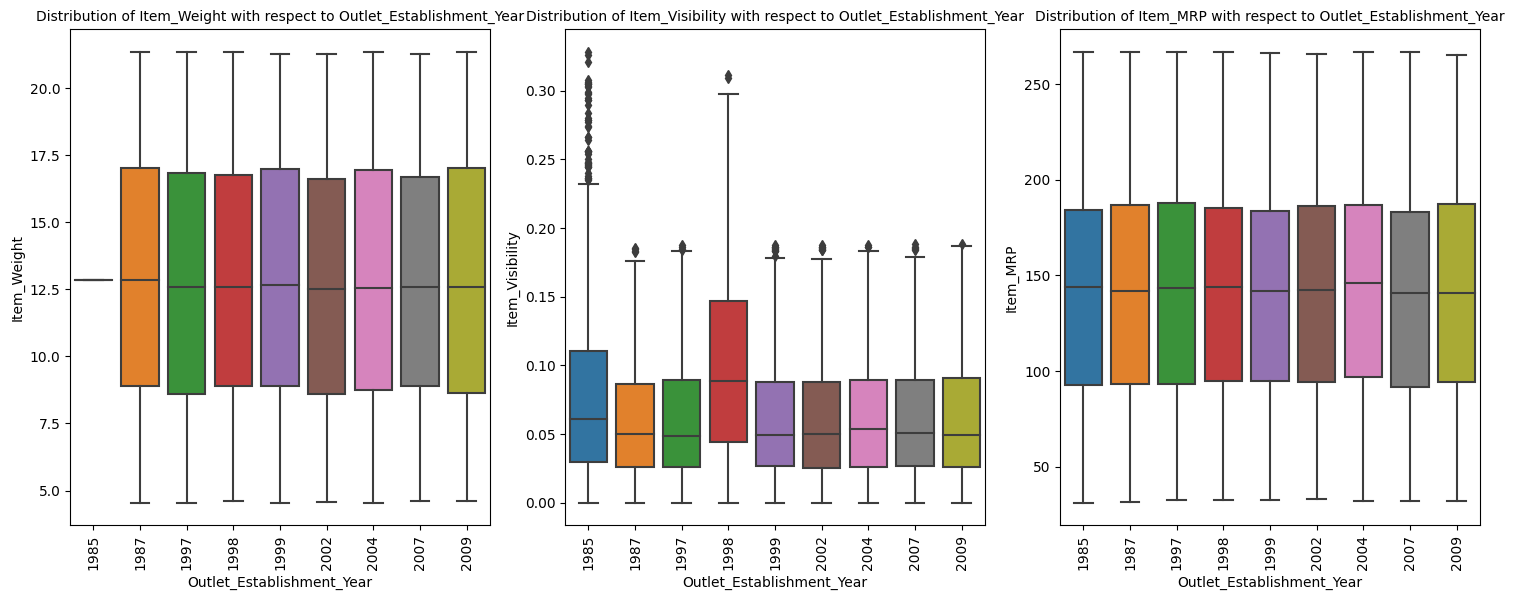

In [46]:
# categorical vs numerical
for cat_col in cat_cols:
    fig = plt.figure(figsize=(15, 40))
    j = 1
    for num_col in num_cols:
        ax = fig.add_subplot(len(cat_cols), len(num_cols), j)
        sns.boxplot(y=num_col, x=cat_col, data=train, ax=ax)
        ax.set_xlabel(cat_col)
        ax.set_ylabel(num_col)
        ax.set_title('Distribution of {} with respect to {}'.format(num_col, cat_col), fontsize=10)
        ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 45 degrees
        j = j + 1
    
fig.tight_layout()  # Adjust spacing between subplots
plt.show()


In [96]:
train_corr = train[num_cols].corr()
train_corr.head()

,Item_Weight,Item_Visibility,Item_MRP
Item_Weight,1.000000,-0.012049,0.024756
Item_Visibility,-0.012049,1.000000,-0.001315
Item_MRP,0.024756,-0.001315,1.000000


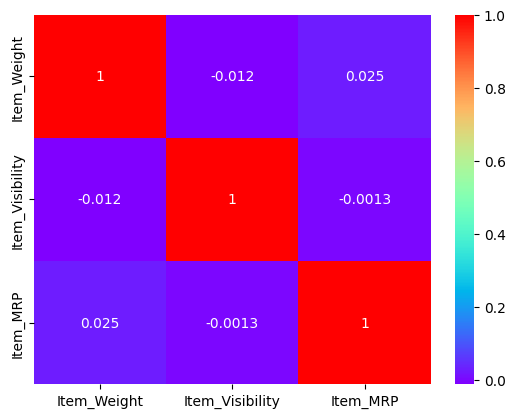

In [97]:
sns.heatmap(train_corr, annot=True, cmap='rainbow')
plt.show()

In [99]:
def handle_outliers(df,var,target,tol):
    var_data = df[var].sort_values().values
    q25, q75 = np.percentile(var_data, 25), np.percentile(var_data, 75)
    
    print('Outliers handling for {}'.format(var))
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('IQR {}'.format(iqr))
    
    cut_off = iqr * tol
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('{} Lower: {}'.format(var,lower))
    print('{} Upper: {}'.format(var,upper))
    
    outliers = [x for x in var_data if x < lower or x > upper]

    print('Number of Outliers in feature {}: {}'.format(var,len(outliers)))

    print('{} outliers:{}'.format(var,outliers))

    print('----' * 25)
    print('\n')
    print('\n')
        
    return list(df[(df[var] > upper) | (df[var] < lower)].index)

In [100]:
outliers = []
for num_col in num_cols:
    outliers.extend(handle_outliers(train,num_col,target,1.5))
outliers = list(set(outliers))
print(len(outliers))

Outliers handling for Item_Weight
Quartile 25: 9.31 | Quartile 75: 16.0
IQR 6.6899999999999995
Cut Off: 10.035
Item_Weight Lower: -0.7249999999999996
Item_Weight Upper: 26.035
Number of Outliers in feature Item_Weight: 0
Item_Weight outliers:[]
----------------------------------------------------------------------------------------------------




Outliers handling for Item_Visibility
Quartile 25: 0.0269894775 | Quartile 75: 0.0945852925
IQR 0.067595815
Cut Off: 0.1013937225
Item_Visibility Lower: -0.07440424500000001
Item_Visibility Upper: 0.195979015
Number of Outliers in feature Item_Visibility: 144
Item_Visibility outliers:[0.196438668, 0.196490902, 0.196659953, 0.19780911, 0.198316649, 0.198424841, 0.19875618, 0.19899855, 0.199935881, 0.199955274, 0.2004264, 0.20168772, 0.203510667, 0.2047, 0.204713036, 0.204984538, 0.205294827, 0.205484395, 0.205605116, 0.207783483, 0.208162156, 0.208397715, 0.208662546, 0.208987123, 0.20914265, 0.209162936, 0.209600084, 0.210021713, 0.210375806,

In [101]:
#dropping the outliers
train = train.drop(outliers)

In [102]:
train.shape

(8379, 12)

In [103]:
train = train[num_cols + cat_cols + [target]]


In [104]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Type,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,Dairy,LF,OUT049,Medium,Tier 1,Supermarket Type1,1999,3735.1380
1,5.92,0.019278,48.2692,Soft Drinks,Regular,OUT018,Medium,Tier 3,Supermarket Type2,2009,443.4228
2,17.50,0.016760,141.6180,Meat,LF,OUT049,Medium,Tier 1,Supermarket Type1,1999,2097.2700
3,19.20,0.000000,182.0950,Fruits and Vegetables,Regular,OUT010,Medium,Tier 3,Grocery Store,1998,732.3800
4,8.93,0.000000,53.8614,Household,LF,OUT013,High,Tier 3,Supermarket Type1,1987,994.7052


In [105]:
train = pd.get_dummies(train,columns=cat_cols,drop_first=True)
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.30,0.016047,249.8092,3735.1380,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,5.92,0.019278,48.2692,443.4228,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,17.50,0.016760,141.6180,2097.2700,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,19.20,0.000000,182.0950,732.3800,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,8.93,0.000000,53.8614,994.7052,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [106]:
train_data,test_data = train_test_split(train, test_size = .2, random_state = 101)

In [107]:
X_train = train_data.iloc[:,:-1]
X_test = test_data.iloc[:,:-1]

y_train = train_data.iloc[:,-1]
y_test = test_data.iloc[:,-1]

In [108]:
X_train.shape, X_test.shape

((6703, 43), (1676, 43))

In [109]:
y_train.shape, y_test.shape

((6703,), (1676,))

In [110]:
train_df = pd.concat([X_train,y_train],axis = 1)
train_df.to_csv('preprocessed_train.csv',index = False)

test_df = pd.concat([X_test,y_test], axis = 1)
test_df.to_csv('preprocessed_test.csv',index = False)

In [111]:
train = pd.read_csv('preprocessed_train.csv')
test = pd.read_csv('preprocessed_test.csv')

In [112]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,12.850000,0.121725,45.1428,527.3136,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,15.600000,0.081268,110.2544,1789.6704,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,8.785000,0.020609,155.1656,4016.1056,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,12.857645,0.114610,197.0084,3372.9428,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,6.850000,0.022864,260.0594,6018.1662,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


In [113]:
X_train = train.drop(['Item_Outlet_Sales'], axis = 1).values
X_test = test.drop(['Item_Outlet_Sales'], axis = 1).values

In [114]:
y_train = train['Item_Outlet_Sales'].values
y_test = test['Item_Outlet_Sales'].values

In [115]:
model_dict = {"Linear Regression": linear_model.LinearRegression(),
            "SGDRegressor" : linear_model.SGDRegressor() }

In [116]:
for key,regressor in model_dict.items():
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print('The evalution scores for: ',regressor.__class__.__name__, 'are:')
    mse = metrics.mean_squared_error(y_test,y_pred)
    rmse = mse ** 0.5
    mae = metrics.mean_absolute_error(y_test,y_pred)
    mdae = metrics.median_absolute_error(y_test,y_pred)
    print('MSE :', mse)
    print('RMSE: ', rmse)
    print('MAE: ', mae)
    print('MDAE: ', mdae)
    print('\n')

The evalution scores for:  LinearRegression are:
MSE : 1266046.7707918226
RMSE:  1125.1874380705744
MAE:  852.8235074943289
MDAE:  667.1745942948626


The evalution scores for:  SGDRegressor are:
MSE : 5.373507371809206e+25
RMSE:  7330421114649.012
MAE:  6686336503126.62
MDAE:  6724253084704.737




In [117]:
# Scaling the numerical features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [119]:
model = Sequential()

In [122]:
# Model training and evaluation
model = Sequential()
model.add(Dense(200, input_shape=(X_train.shape[1],), kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(100, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(50, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

In [123]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

In [124]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               8800      
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 34,001
Trainable params: 34,001
Non-trainable params: 0
_________________________________________________________________
None


In [126]:
X_train.shape

(6703, 43)

In [127]:
y_train.shape

(6703,)

In [125]:
(200 * 43) + 200

8800

In [128]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)


In [130]:
history = model.fit(X_train,
                    y_train,
                    batch_size=200,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_test, y_test)).history


Epoch 1/100
34/34 [==============================] - 0s 9ms/step - loss: 735.8032 - mse: 1146825.5000 - val_loss: 779.4271 - val_mse: 1197312.6250
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 735.1922 - mse: 1145992.7500 - val_loss: 781.1461 - val_mse: 1197674.5000
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 733.9416 - mse: 1142715.2500 - val_loss: 781.4807 - val_mse: 1191970.2500
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 734.6794 - mse: 1143531.1250 - val_loss: 781.9899 - val_mse: 1195267.5000
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 734.6550 - mse: 1142697.6250 - val_loss: 783.3386 - val_mse: 1192711.6250
Epoch 6/100
34/34 [==============================] - 0s 8ms/step - loss: 733.1783 - mse: 1140969.3750 - val_loss: 782.4927 - val_mse: 1189933.1250
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 733.3027 - mse: 1144270.6250 - val_loss: 781.

In [131]:
res_df = pd.DataFrame(history)
res_df.head()

,loss,mse,val_loss,val_mse
0,735.803223,1146825.500,779.427063,1197312.625
1,735.192200,1145992.750,781.146118,1197674.500
2,733.941589,1142715.250,781.480713,1191970.250
3,734.679443,1143531.125,781.989868,1195267.500
4,734.655029,1142697.625,783.338623,1192711.625


Text(0.5, 1.0, 'Training vs Validation MAE')

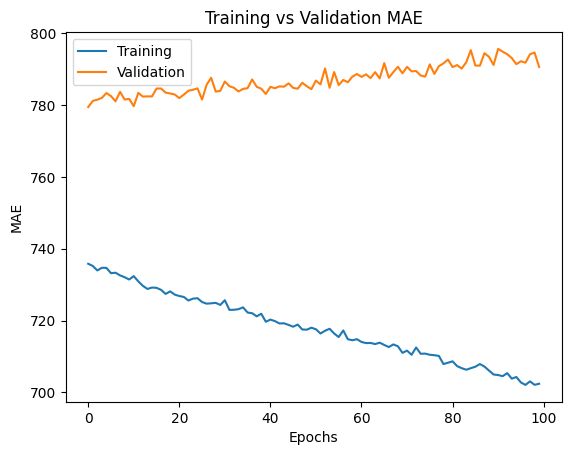

In [132]:
# Plot training vs validation MAE
plt.plot(res_df['loss'],label="Training")
plt.plot(res_df['val_loss'],label="Validation")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')

Text(0.5, 1.0, 'Training vs Validation MSE')

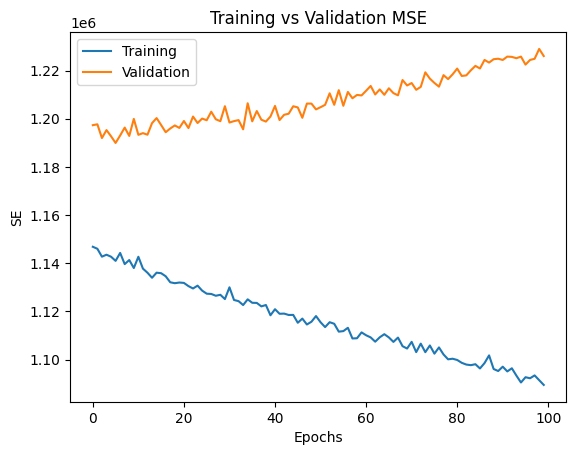

In [133]:
# Plot training vs validation MSE
plt.plot(res_df['mse'],label="Training")
plt.plot(res_df['val_mse'],label="Validation")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('SE')
plt.title('Training vs Validation MSE')